In [2]:
#Import all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import dipy.denoise.nlmeans as nlmeans

In [3]:
#Import all the images or image data to be processed from the local system

swi=nib.load('./data/sub-01_ses-forrestgump_anat_sub-01_ses-forrestgump_acq-mag_veno.nii').get_data()
tof=nib.load('./data/sub-01_ses-forrestgump_anat_sub-01_ses-forrestgump_angio.nii').get_data()
t1=nib.load('./data/sub-01_ses-forrestgump_anat_sub-01_ses-forrestgump_T1w.nii').get_data()
t2=nib.load('./data/sub-01_ses-forrestgump_anat_sub-01_ses-forrestgump_T2w.nii').get_data()
dwi=nib.load('./data/sub-01_ses-forrestgump_dwi_sub-01_ses-forrestgump_dwi.nii').get_data()
bold=nib.load('./data/sub-01_ses-forrestgump_func_sub-01_ses-forrestgump_task-forrestgump_acq-dico_run-01_bold.nii').get_data()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata()

In [4]:
#check the shape of all the provided image
swi.shape    #swi.shape= (512, 512, 500)
tof.shape    #tof.shape=(480, 640, 163)
t1.shape     #t1.shape=(274, 384, 384)
t2.shape     #t2.shape=(274,384,384)
dwi.shape   #dwi.shape=(144, 144, 70, 33)
bold.shape   #bold.shape = (160, 160, 36, 451)

(160, 160, 36, 451)

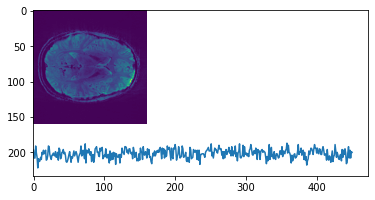

In [5]:
plt.imshow(bold[:,:,18,10])  #Plot the image
plt.plot(bold[80,80,16,:]) # plot the time series

Text(0.5, 1.0, 'bold')

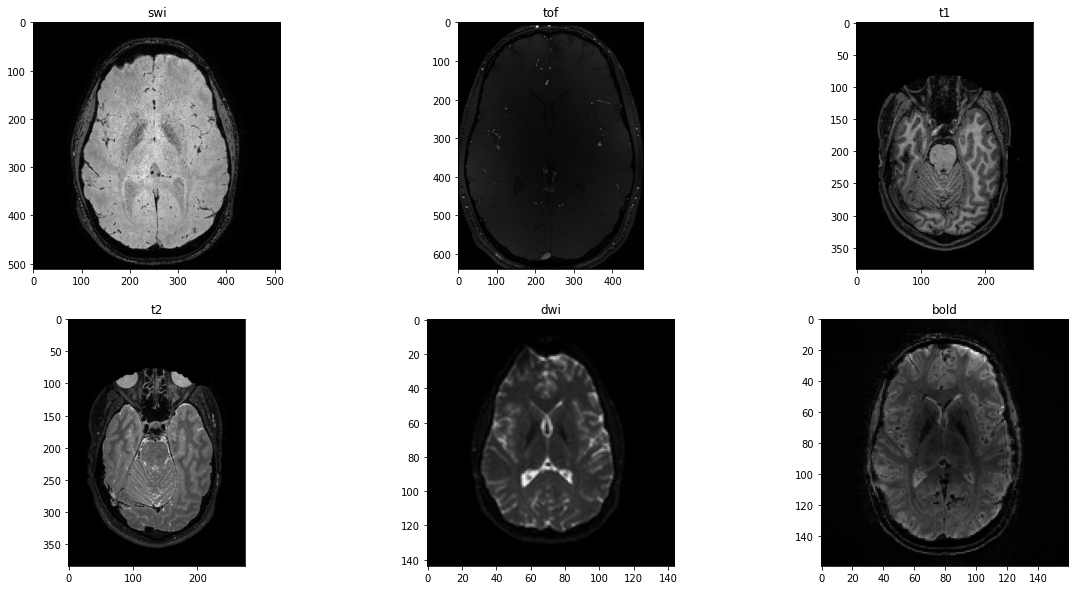

In [6]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2,3,1); plt.imshow(np.rot90(swi[:,:,swi.shape[2]//2]),cmap='gray'); plt.title('swi')
plt.subplot(2,3,2); plt.imshow(np.rot90(tof[:,:,tof.shape[2]//2]),cmap='gray'); plt.title('tof')
plt.subplot(2,3,3); plt.imshow(np.rot90(t1[:,:,t1.shape[2]//2]),cmap='gray'); plt.title('t1')
plt.subplot(2,3,4); plt.imshow(np.rot90(t2[:,:,t2.shape[2]//2]),cmap='gray'); plt.title('t2')
plt.subplot(2,3,5); plt.imshow(np.rot90(dwi[:,:,dwi.shape[2]//2,0]),cmap='gray'); plt.title('dwi')
plt.subplot(2,3,6); plt.imshow(np.rot90(bold[:,:,bold.shape[2]//2,0]),cmap='gray'); plt.title('bold')

Part 1 (A)
Basic plotting: replicate the figure below, but use the ‘jet’ colormap instead of the ‘gray’ colormap

Text(0.5, 1.0, 'bold')

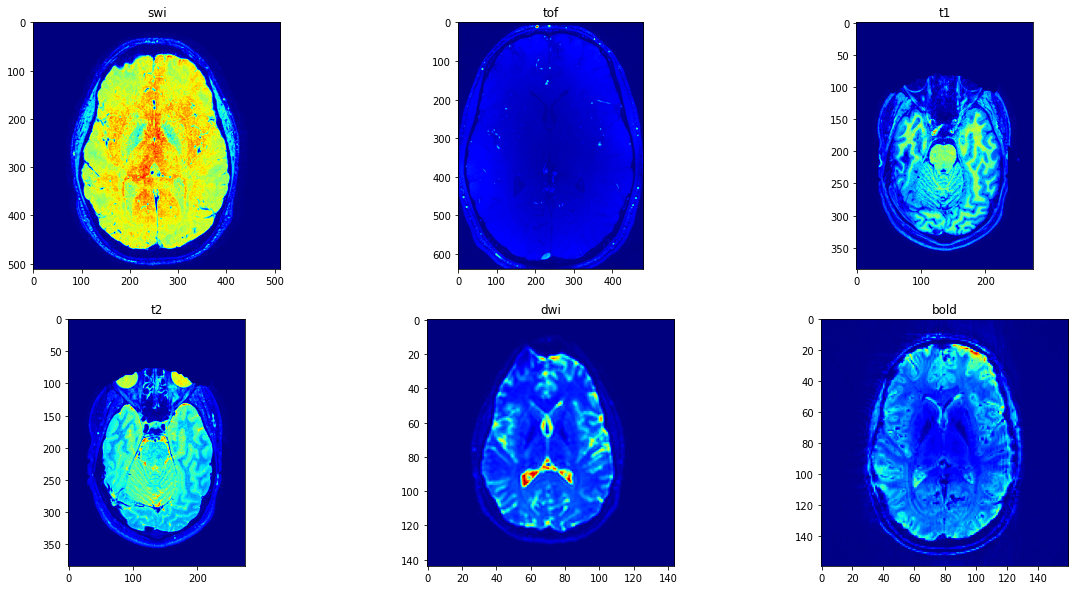

In [7]:
plt.subplot(2,3,1); plt.imshow(np.rot90(swi[:,:,swi.shape[2]//2]),cmap='jet'); plt.title('swi')
plt.subplot(2,3,2); plt.imshow(np.rot90(tof[:,:,tof.shape[2]//2]),cmap='jet'); plt.title('tof')
plt.subplot(2,3,3); plt.imshow(np.rot90(t1[:,:,t1.shape[2]//2]),cmap='jet'); plt.title('t1')
plt.subplot(2,3,4); plt.imshow(np.rot90(t2[:,:,t2.shape[2]//2]),cmap='jet'); plt.title('t2')
plt.subplot(2,3,5); plt.imshow(np.rot90(dwi[:,:,dwi.shape[2]//2,0]),cmap='jet'); plt.title('dwi')
plt.subplot(2,3,6); plt.imshow(np.rot90(bold[:,:,bold.shape[2]//2,0]),cmap='jet'); plt.title('bold')

Text(0.5, 1.0, 'bold')

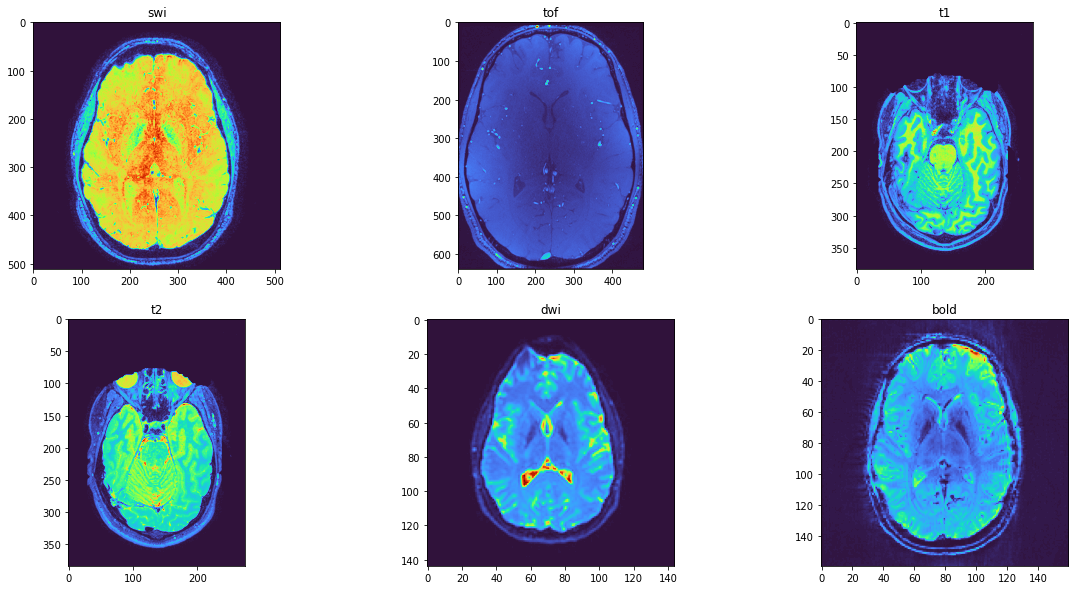

In [8]:
plt.subplot(2,3,1); plt.imshow(np.rot90(swi[:,:,swi.shape[2]//2]),cmap='turbo'); plt.title('swi')
plt.subplot(2,3,2); plt.imshow(np.rot90(tof[:,:,tof.shape[2]//2]),cmap='turbo'); plt.title('tof')
plt.subplot(2,3,3); plt.imshow(np.rot90(t1[:,:,t1.shape[2]//2]),cmap='turbo'); plt.title('t1')
plt.subplot(2,3,4); plt.imshow(np.rot90(t2[:,:,t2.shape[2]//2]),cmap='turbo'); plt.title('t2')
plt.subplot(2,3,5); plt.imshow(np.rot90(dwi[:,:,dwi.shape[2]//2,0]),cmap='turbo'); plt.title('dwi')
plt.subplot(2,3,6); plt.imshow(np.rot90(bold[:,:,bold.shape[2]//2,0]),cmap='turbo'); plt.title('bold')

Part 1 (B)
Use the np.min() and np.max() functions to create minimum and maximum intensity projections respectively (see below) of the SWI and the TOF. Show views from all 3 axes and use jet colormap to display your results. *hint for the SWI, you will probably want to restrict the MIP to ~50-100 slices, and use vmax=300 for the TOF (to better highlight the arteries)

Part 1b: plotting the maximum intensity projection and minimum intensity projection for TOF and SWI

Text(0.5, 1.0, 'swi (axial view), slice 225:300)')

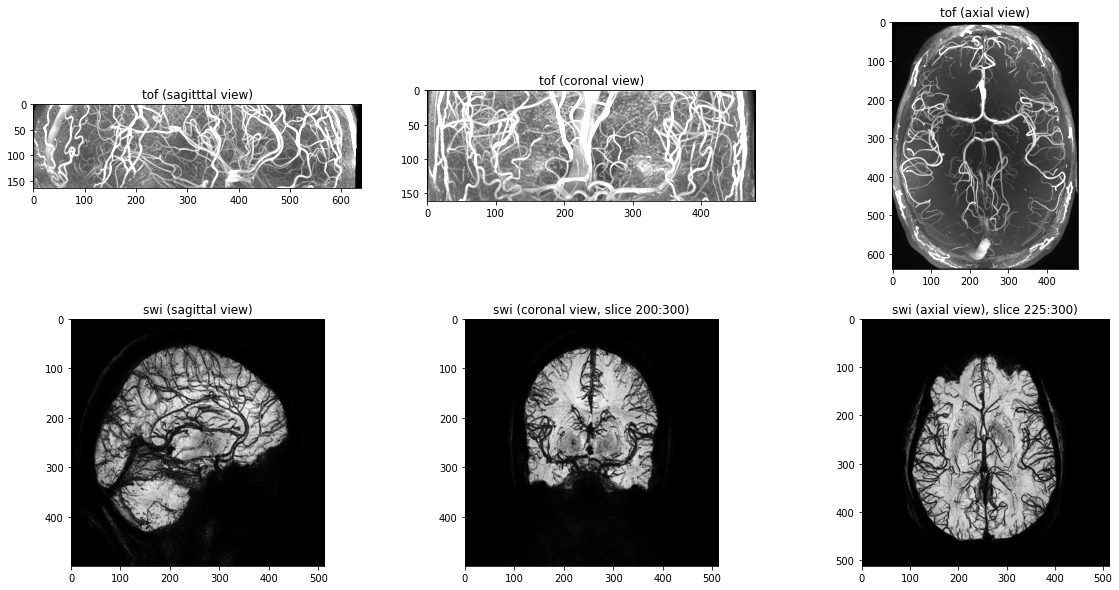

In [9]:
plt.subplot(2,3,1); plt.imshow(np.rot90(np.max(tof,axis=0)),cmap='gray',vmax=400); plt.title('tof (sagitttal view)')
plt.subplot(2,3,2); plt.imshow(np.rot90(np.max(tof,axis=1)),cmap='gray',vmax=400); plt.title('tof (coronal view)')
plt.subplot(2,3,3); plt.imshow(np.rot90(np.max(tof,axis=2)),cmap='gray',vmax=400); plt.title('tof (axial view)')
plt.subplot(2,3,4); plt.imshow(np.rot90(np.min(swi[200:300,:,:],axis=0)),cmap='gray'); plt.title('swi (sagittal view)')
plt.subplot(2,3,5); plt.imshow(np.rot90(np.min(swi[:,200:300,:],axis=1)),cmap='gray'); plt.title('swi (coronal view, slice 200:300)')
plt.subplot(2,3,6); plt.imshow(np.rot90(np.min(swi[:,:,225:300],axis=2)),cmap='gray'); plt.title('swi (axial view), slice 225:300)')

# Contrast extraction via RMS, MC and entropy
There are 3 types of contrast root mean square, Michelson, and entropy
MC = (image.max()-image.min())/(image.max()+image.min())
RMS = np.sqrt(1/(image.size-1)*np.sum(image-np.mean(image))**2)


In [10]:
#Root Mean Square estimation
def RMC(image):
    RMC = np.sqrt(1/(image.size-1) * np.sum((image-np.mean(image))**2))
    return RMC

In [11]:
RMC(swi)
RMC(tof)
RMC(t1)
RMC(t2)
RMC(dwi)
RMC(bold)

181.40101192336422

In [12]:
#Michelson estimation
def Michelson(img):
    MC = (img.max() - img.min())/(img.max() + img.min())
    return MC

In [13]:
#Entropy of an image
def entropy(im):
    p = np.array([(im==v).sum() for v in range(256)])
    p = p/p.sum()
    e = -(p[p>0]*np.log2(p[p>0])).sum()
    return e

Text(0.5, 1.0, 'bold\nRCM = 181.401012,\n MC=1.000000,\n Entropy=6.022124 ')

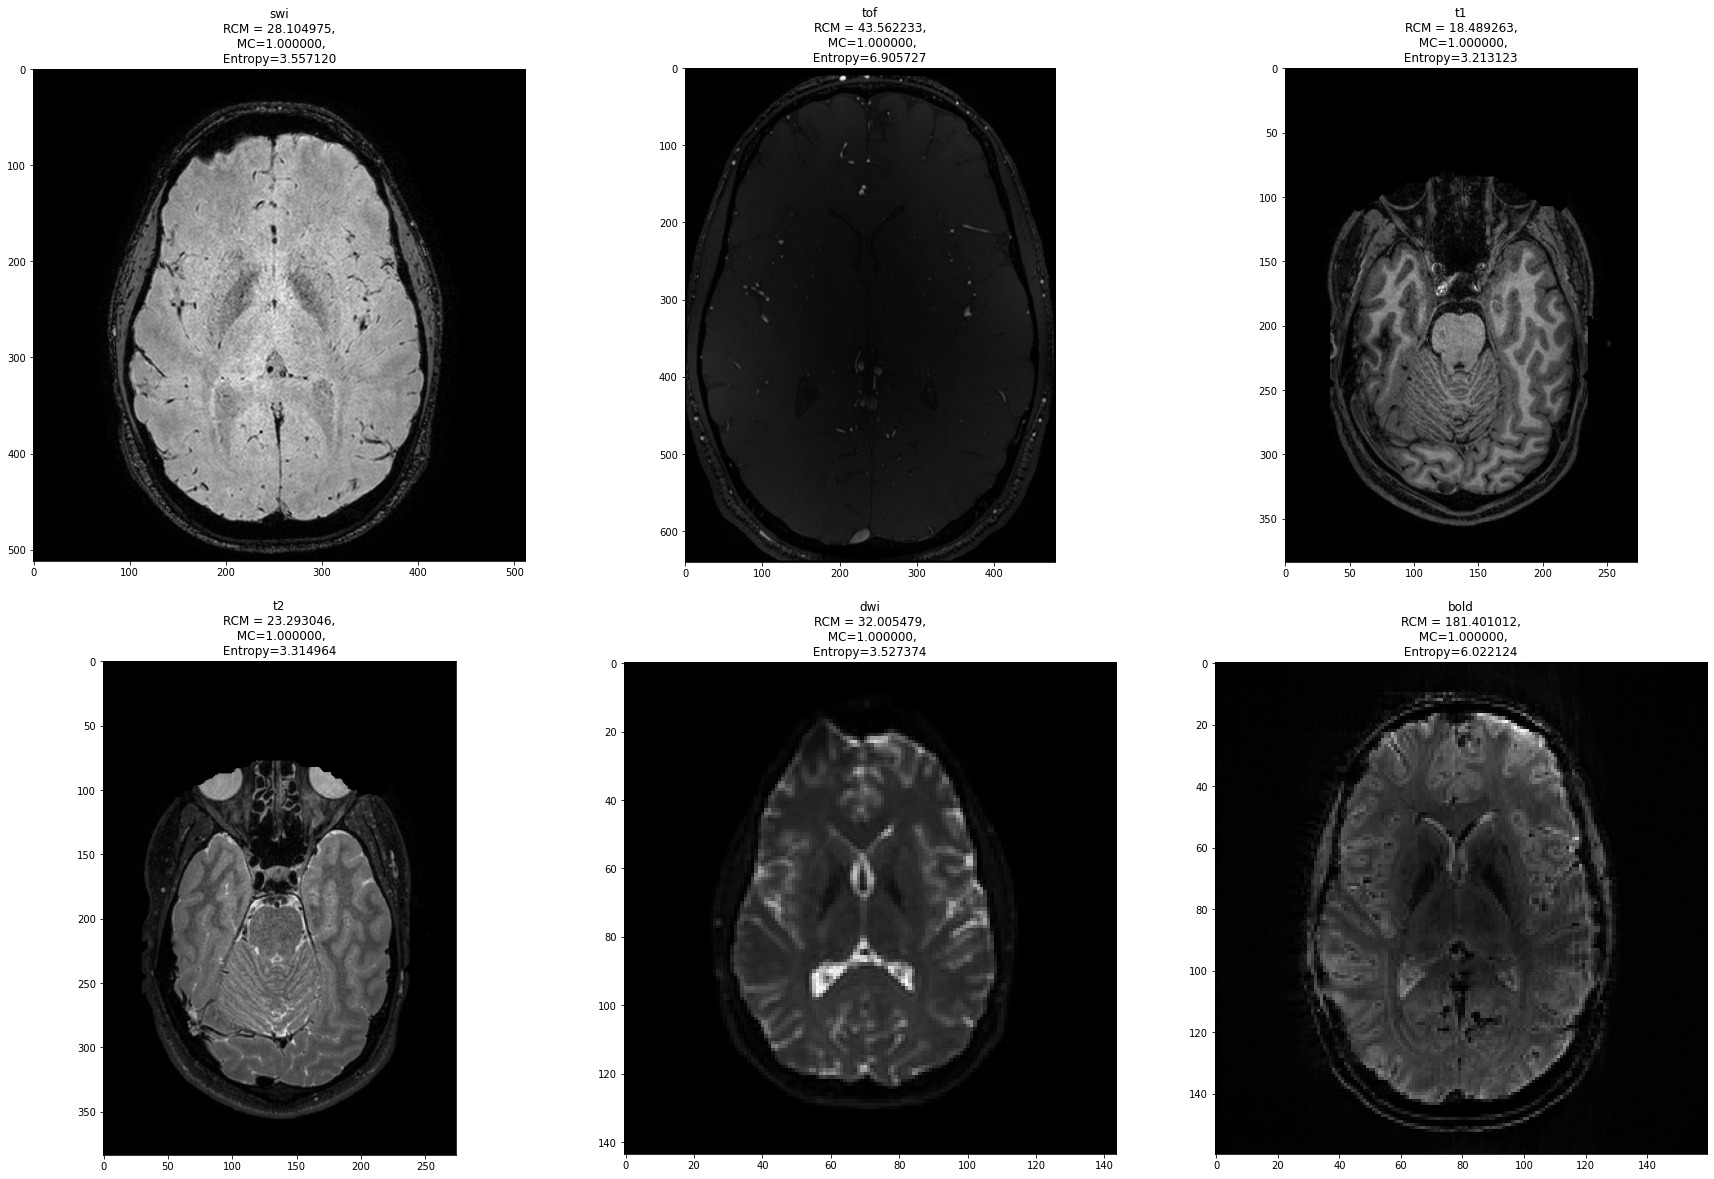

In [14]:
plt.rcParams["figure.figsize"] = (30,20)
plt.subplot(2,3,1); plt.imshow(np.rot90(swi[:,:,swi.shape[2]//2]),cmap='gray'); plt.title('swi\nRCM = %f,\n MC=%f,\n Entropy=%f ' %(RMC(swi),Michelson(swi),entropy(swi)))
plt.subplot(2,3,2); plt.imshow(np.rot90(tof[:,:,tof.shape[2]//2]),cmap='gray'); plt.title('tof\nRCM = %f,\n MC=%f,\n Entropy=%f ' %(RMC(tof),Michelson(tof),entropy(tof)))
plt.subplot(2,3,3); plt.imshow(np.rot90(t1[:,:,t1.shape[2]//2]),cmap='gray'); plt.title('t1\nRCM = %f,\n MC=%f,\n Entropy=%f ' %(RMC(t1),Michelson(t1),entropy(t1)))
plt.subplot(2,3,4); plt.imshow(np.rot90(t2[:,:,t2.shape[2]//2]),cmap='gray'); plt.title('t2\nRCM = %f,\n MC=%f,\n Entropy=%f ' %(RMC(t2),Michelson(t2),entropy(t2)))
plt.subplot(2,3,5); plt.imshow(np.rot90(dwi[:,:,dwi.shape[2]//2,0]),cmap='gray'); plt.title('dwi\nRCM = %f,\n MC=%f,\n Entropy=%f ' %(RMC(dwi),Michelson(dwi),entropy(dwi)))
plt.subplot(2,3,6); plt.imshow(np.rot90(bold[:,:,bold.shape[2]//2,0]),cmap='gray'); plt.title('bold\nRCM = %f,\n MC=%f,\n Entropy=%f ' %(RMC(bold),Michelson(bold),entropy(bold)))

#SNR estimation, quantifying noise

In [15]:
#SNR Calculation
def SNR(signal_patch,noise_patch):
    SNR = np.mean(signal_patch)/np.std(noise_patch)
    return SNR

In [16]:
swi_SNR = SNR(swi[180:200,200:220,10:30],swi[100:120, 400:420, :])
tof_SNR = SNR(tof[380:400,200:220,10:30],tof[10:30, 10:30, :])
t1_SNR = SNR(t1[180:200,200:220,10:30],t1[50:70, 20:40,:])
t2_SNR = SNR(t2[180:200,200:220,10:30],t2[50:70, 20:40,:])
dwi_SNR = SNR(dwi[80:100,80:100,dwi.shape[2]//2,0],dwi[10:30, 10:30,dwi.shape[2]//2,0])
bold_SNR = SNR(bold[80:100,80:100,bold.shape[2]//2,0],bold[10:30, 10:30,bold.shape[2]//2,0])

In [17]:
#3D image sclicing into 2D. 
def slicing_3D_2D(img):
    img=img[:,:,0]
    return img

In [18]:
#4Dimage sclicing into 2
def slicing_4D_2D(img):
    img=img[:,:,0,0]
    return img

Text(0.5, 1.0, 'bold SNR: 60.90259157235899')

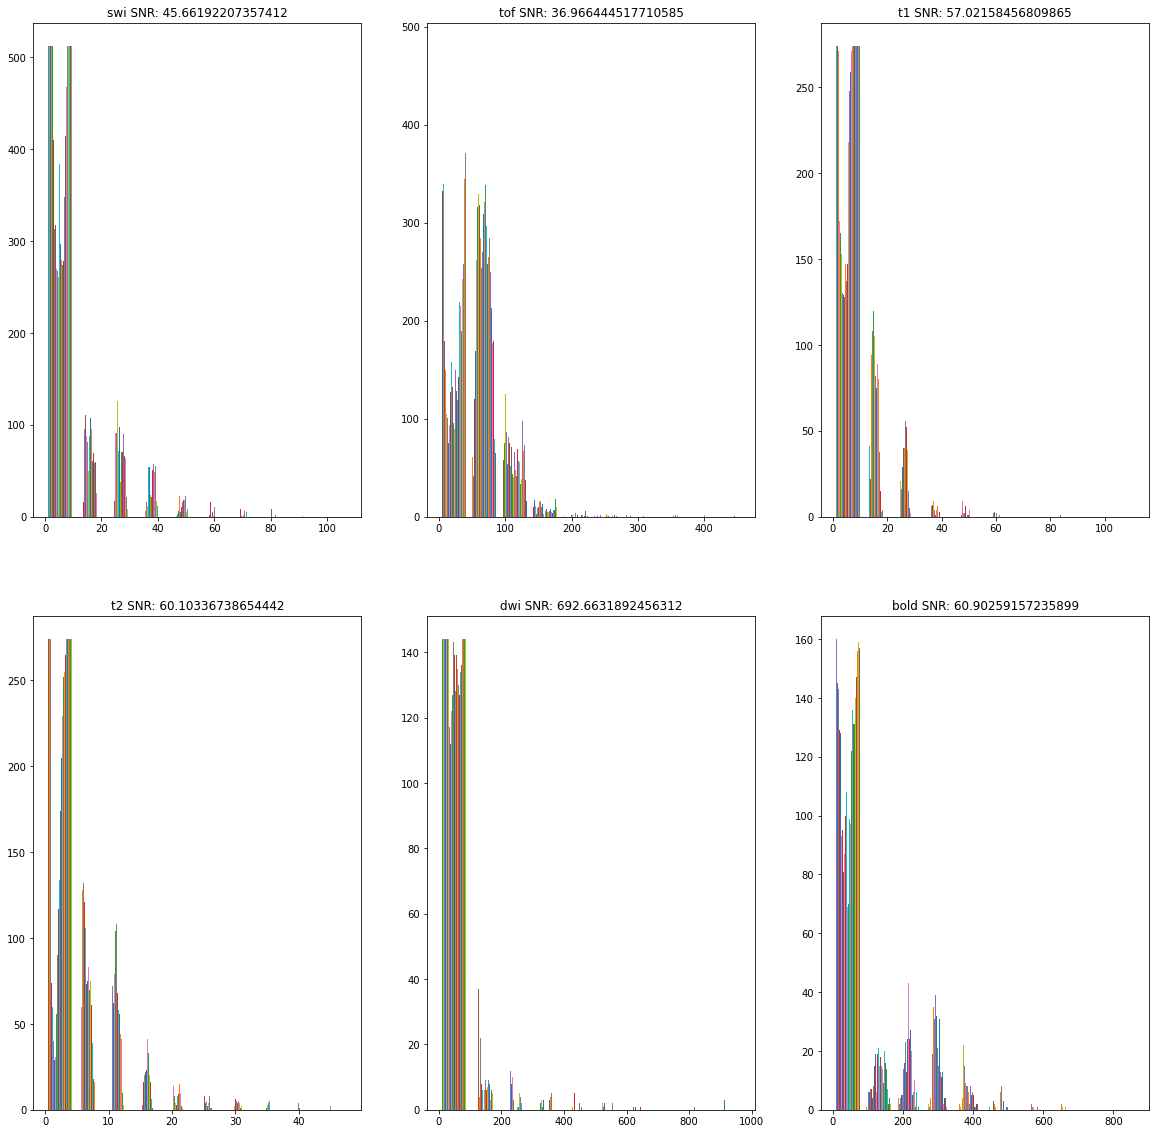

In [19]:
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(2,3,1);plt.hist(slicing_3D_2D(swi));plt.title('swi SNR: ' + str(swi_SNR)) 
plt.subplot(2,3,2);plt.hist(slicing_3D_2D(tof));plt.title('tof SNR: ' + str(tof_SNR)) 
plt.subplot(2,3,3);plt.hist(slicing_3D_2D(t1));plt.title('t1 SNR: ' + str(t1_SNR)) 
plt.subplot(2,3,4);plt.hist(slicing_3D_2D(t2));plt.title('t2 SNR: ' + str(t2_SNR)) 
plt.subplot(2,3,5);plt.hist(slicing_4D_2D(dwi));plt.title('dwi SNR: ' + str(dwi_SNR)) 
plt.subplot(2,3,6);plt.hist(slicing_4D_2D(bold));plt.title('bold SNR: ' + str(bold_SNR)) 

#apply linear filtering to each image for 𝜎 = 2, 𝜎 = 4, and 𝜎 = 15. Create 3 new versions of the figure in part 1a, one figure for each sigma. Show the middle z-slice of the filtered image in all subplots

In [20]:
import numpy.fft as fft

In [21]:
def fft_guassian(t1, sigma):
    freqspace = fft.fftn(t1)
    xv, yv, zv = np.mgrid[-t1.shape[0]//2:t1.shape[0]//2,
                          -t1.shape[1]//2:t1.shape[1]//2,
                          -t1.shape[2]//2:t1.shape[2]//2]
    gaussian3d = (1/(sigma**3*(2*np.pi)**(3/2))) * np.exp(-(xv**2+yv**2+zv**2)/(2*sigma**2))
    filtered = fft.fftshift(freqspace) * gaussian3d
    inv = np.abs(fft.ifftn(fft.fftshift(filtered)))
    return inv

In [22]:
fft_guassian_dict = {}
fft_guassian_dict['swi'] = {}
fft_guassian_dict['tof'] = {}
fft_guassian_dict['t1'] = {}
fft_guassian_dict['t2'] = {}
fft_guassian_dict['dwi'] = {}
fft_guassian_dict['bold'] = {}
for sigma in [2, 4, 15]:
    fft_guassian_dict['swi'][sigma] = fft_guassian(swi, sigma)
    fft_guassian_dict['tof'][sigma] = fft_guassian(tof, sigma)
    fft_guassian_dict['t1'][sigma] = fft_guassian(t1, sigma)
    fft_guassian_dict['t2'][sigma] = fft_guassian(t2, sigma)
    fft_guassian_dict['dwi'][sigma] = fft_guassian(dwi[:,:,:,dwi.shape[3]//2], sigma)
    fft_guassian_dict['bold'][sigma] = fft_guassian(bold[:,:,:,bold.shape[3]//2], sigma)
fft_guassian_dict

{'swi': {2: array([[[2.84249850e-06, 2.93624980e-06, 3.03264042e-06, ...,
           2.57669439e-06, 2.66275869e-06, 2.75134755e-06],
          [2.98069929e-06, 3.07882064e-06, 3.17970230e-06, ...,
           2.70249596e-06, 2.79257630e-06, 2.88529775e-06],
          [3.13114921e-06, 3.23397837e-06, 3.33969536e-06, ...,
           2.83957288e-06, 2.93398725e-06, 3.03116590e-06],
          ...,
          [2.49808183e-06, 2.58067024e-06, 2.66557297e-06, ...,
           2.26386227e-06, 2.33971127e-06, 2.41777342e-06],
          [2.60148871e-06, 2.68748076e-06, 2.77588925e-06, ...,
           2.35765560e-06, 2.43661106e-06, 2.51787723e-06],
          [2.71619995e-06, 2.80591067e-06, 2.89814613e-06, ...,
           2.46184527e-06, 2.54420366e-06, 2.62897653e-06]],
  
         [[2.98622241e-06, 3.08444560e-06, 3.18541106e-06, ...,
           2.70760846e-06, 2.79784289e-06, 2.89070131e-06],
          [3.13209696e-06, 3.23491674e-06, 3.34060447e-06, ...,
           2.84043200e-06, 2.93489513e-

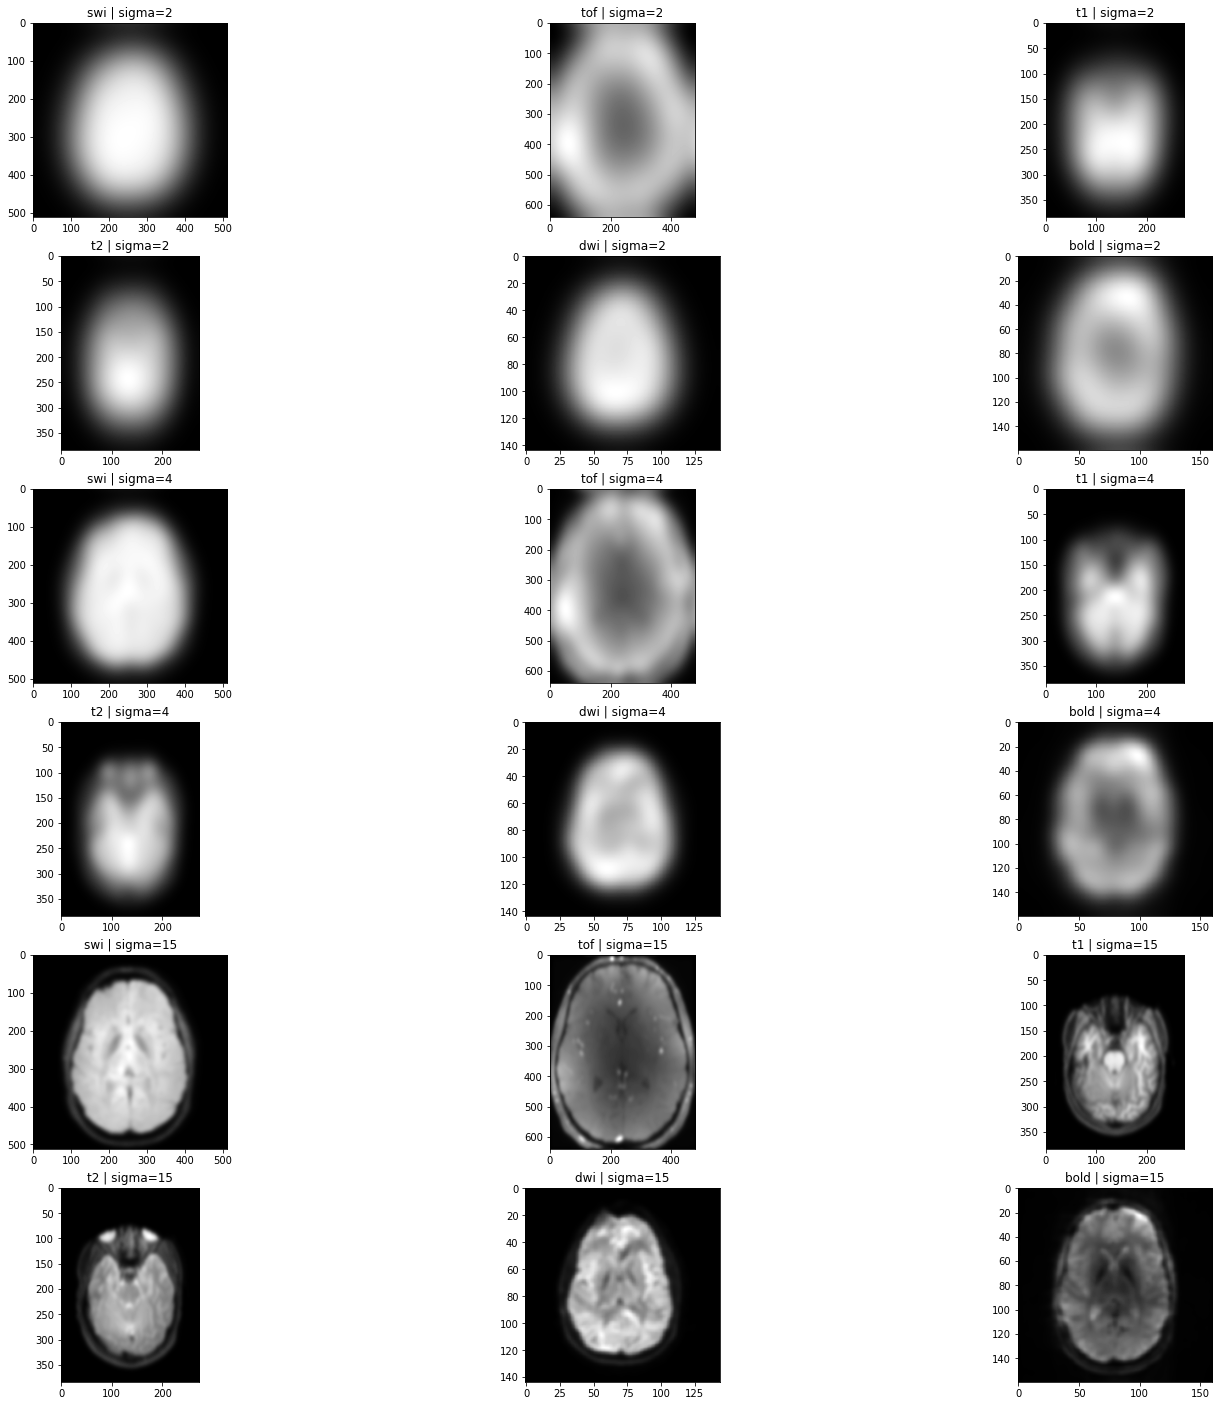

In [23]:
plt.rcParams["figure.figsize"] = (25,25)
index = 0
for sigma in [2, 4, 15]:
    index+=1; plt.subplot(6,3,index); plt.imshow(np.rot90(fft_guassian_dict['swi'][sigma][:,:,swi.shape[2]//2]),cmap='gray'); plt.title(f'swi | sigma={sigma}')
    index+=1; plt.subplot(6,3,index); plt.imshow(np.rot90(fft_guassian_dict['tof'][sigma][:,:,tof.shape[2]//2]),cmap='gray'); plt.title(f'tof | sigma={sigma}')
    index+=1; plt.subplot(6,3,index); plt.imshow(np.rot90(fft_guassian_dict['t1'][sigma][:,:,t1.shape[2]//2]),cmap='gray'); plt.title(f't1 | sigma={sigma}')
    index+=1; plt.subplot(6,3,index); plt.imshow(np.rot90(fft_guassian_dict['t2'][sigma][:,:,t2.shape[2]//2]),cmap='gray'); plt.title(f't2 | sigma={sigma}')
    index+=1; plt.subplot(6,3,index); plt.imshow(np.rot90(fft_guassian_dict['dwi'][sigma][:,:,dwi.shape[2]//2]),cmap='gray'); plt.title(f'dwi | sigma={sigma}')
    index+=1; plt.subplot(6,3,index); plt.imshow(np.rot90(fft_guassian_dict['bold'][sigma][:,:,bold.shape[2]//2]),cmap='gray'); plt.title(f'bold | sigma={sigma}')

In [25]:
print("Processing swi")
swi_denoised = nlmeans.nlmeans(swi,10)
print("Processing tof")
tof_denoised = nlmeans.nlmeans(tof,10)
print("Processing t1")
t1_denoised = nlmeans.nlmeans(t1,10)
print("Processing t2")
t2_denoised = nlmeans.nlmeans(t2,10)
print("Processing dwi")
dwi_denoised = nlmeans.nlmeans(dwi,10)
print("Processing bold")
bold_denoised = nlmeans.nlmeans(bold,10)

Processing swi
Processing tof
Processing t1
Processing t2
Processing dwi
Processing bold


In [46]:
dwi[:,:,:,dwi.shape[3]//2][:,:,dwi.shape[2]//2].shape

(144, 144)

Text(0.5, 1.0, 'bold-method-noise')

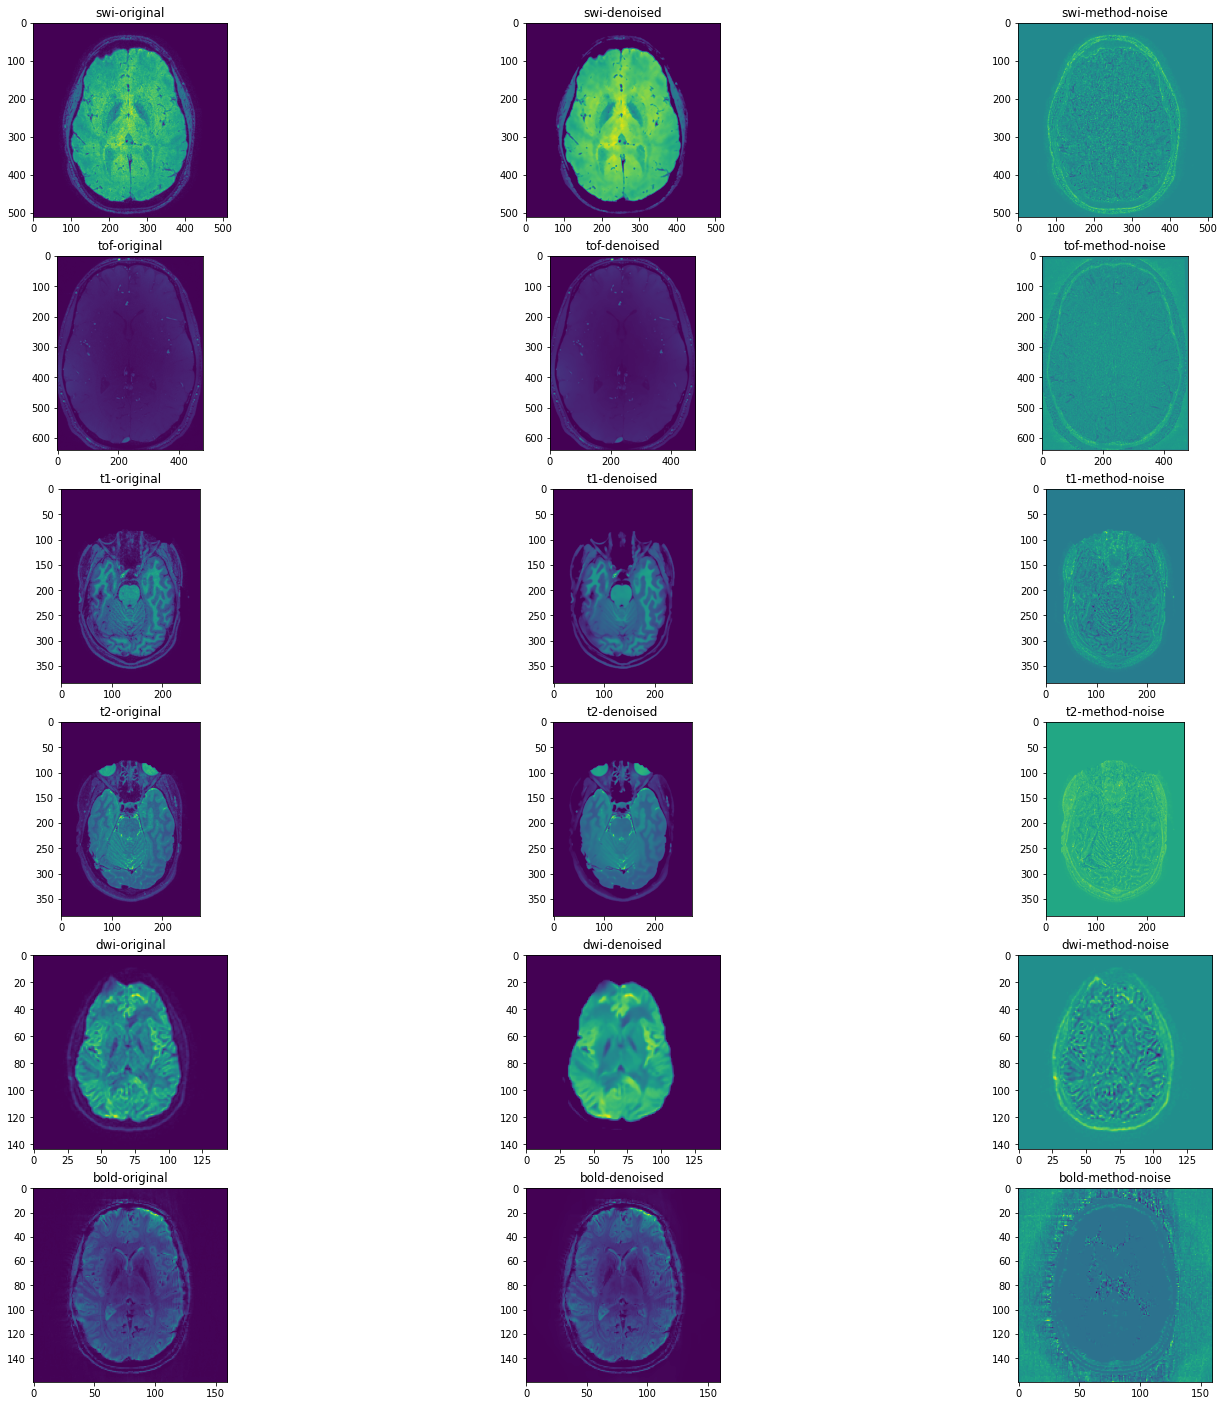

In [52]:
plt.rcParams["figure.figsize"] = (25,25)
plt.subplot(6,3,1); plt.imshow(np.rot90(swi[:,:,swi.shape[2]//2])); plt.title('swi-original')
plt.subplot(6,3,2); plt.imshow(np.rot90(swi_denoised[:,:,swi.shape[2]//2])); plt.title('swi-denoised')
plt.subplot(6,3,3); plt.imshow(np.rot90(swi[:,:,swi.shape[2]//2] - swi_denoised[:,:,swi.shape[2]//2])); plt.title('swi-method-noise')

plt.subplot(6,3,4); plt.imshow(np.rot90(tof[:,:,tof.shape[2]//2])); plt.title('tof-original')
plt.subplot(6,3,5); plt.imshow(np.rot90(tof_denoised[:,:,tof.shape[2]//2])); plt.title('tof-denoised')
plt.subplot(6,3,6); plt.imshow(np.rot90(tof[:,:,tof.shape[2]//2] - tof_denoised[:,:,tof.shape[2]//2])); plt.title('tof-method-noise')

plt.subplot(6,3,7); plt.imshow(np.rot90(t1[:,:,t1.shape[2]//2])); plt.title('t1-original')
plt.subplot(6,3,8); plt.imshow(np.rot90(t1_denoised[:,:,t1.shape[2]//2])); plt.title('t1-denoised')
plt.subplot(6,3,9); plt.imshow(np.rot90(t1[:,:,t1.shape[2]//2] - t1_denoised[:,:,t1.shape[2]//2])); plt.title('t1-method-noise')

plt.subplot(6,3,10); plt.imshow(np.rot90(t2[:,:,t2.shape[2]//2])); plt.title('t2-original')
plt.subplot(6,3,11); plt.imshow(np.rot90(t2_denoised[:,:,t2.shape[2]//2])); plt.title('t2-denoised')
plt.subplot(6,3,12); plt.imshow(np.rot90(t2[:,:,t2.shape[2]//2] - t2_denoised[:,:,t2.shape[2]//2])); plt.title('t2-method-noise')

plt.subplot(6,3,13); plt.imshow(np.rot90(dwi[:,:,:,dwi.shape[3]//2][:,:,dwi.shape[2]//2])); plt.title('dwi-original')
plt.subplot(6,3,14); plt.imshow(np.rot90(dwi_denoised[:,:,:,dwi.shape[3]//2][:,:,dwi.shape[2]//2])); plt.title('dwi-denoised')
plt.subplot(6,3,15); plt.imshow(np.rot90(dwi[:,:,:,dwi.shape[3]//2][:,:,dwi.shape[2]//2] - dwi_denoised[:,:,:,dwi.shape[3]//2][:,:,dwi.shape[2]//2])); plt.title('dwi-method-noise')

plt.subplot(6,3,16); plt.imshow(np.rot90(bold[:,:,:,bold.shape[3]//2][:,:,bold.shape[2]//2])); plt.title('bold-original')
plt.subplot(6,3,17); plt.imshow(np.rot90(bold_denoised[:,:,:,bold.shape[3]//2][:,:,bold.shape[2]//2])); plt.title('bold-denoised')
plt.subplot(6,3,18); plt.imshow(np.rot90(bold[:,:,:,bold.shape[3]//2][:,:,bold.shape[2]//2] - bold_denoised[:,:,:,bold.shape[3]//2][:,:,bold.shape[2]//2])); plt.title('bold-method-noise')